# LAB 7
BL.EN.U4AIE21133

# Use HMM for classification of your speech signal using STFT features

In [2]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [5]:
pip install numpy==1.21


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


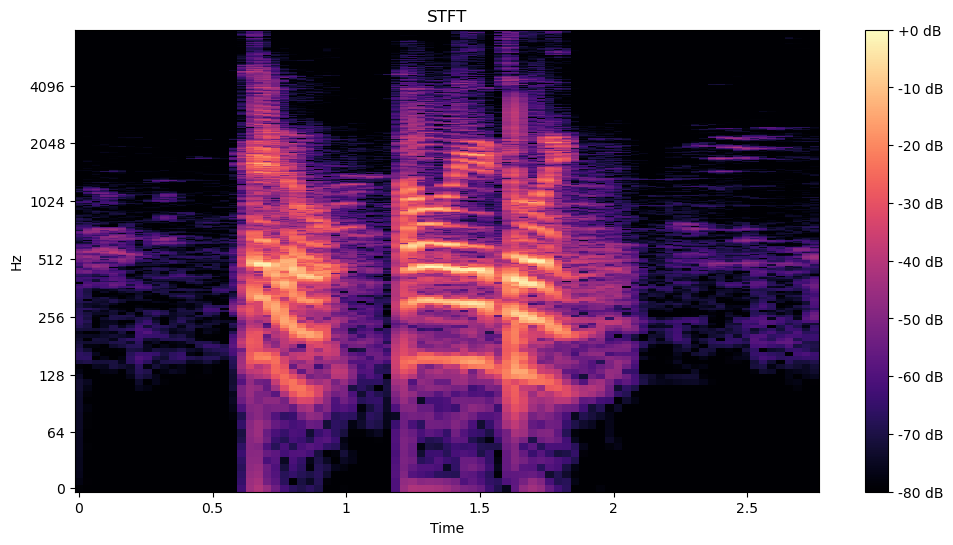

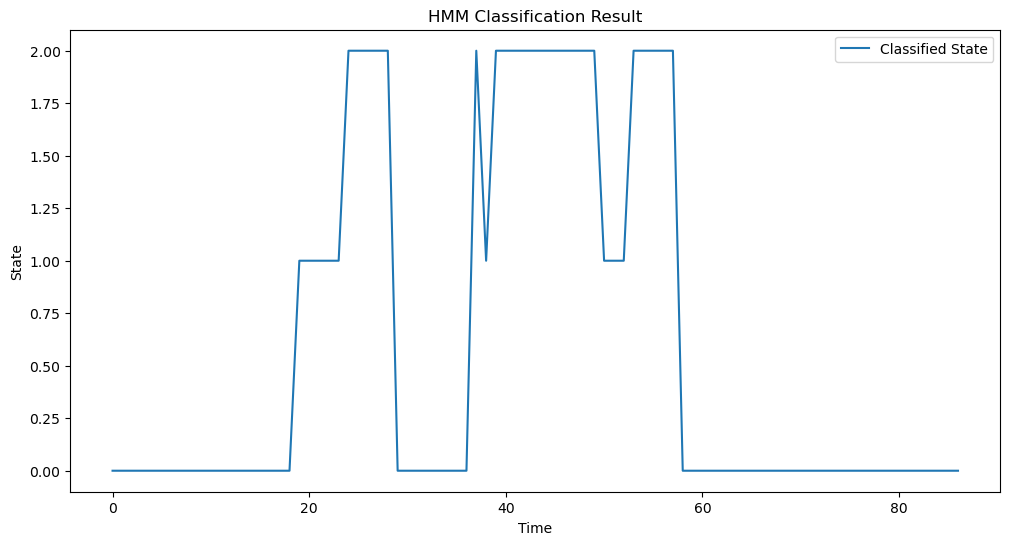

HMM Model Parameters:
Transition Matrix:
[[0.96363636 0.01818182 0.01818182]
 [0.         0.66666667 0.33333333]
 [0.09090909 0.09090909 0.81818182]]
Means:
[[0.01295014 0.00969972 0.00654563 ... 0.00234933 0.00221176 0.00186486]
 [0.92729162 0.71834299 0.59151833 ... 0.46660588 0.47505141 0.4119274 ]
 [0.74279046 0.42798667 0.16901871 ... 0.05734889 0.07052129 0.07839781]]
Covariances:
[[[2.19147390e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.36378284e-04 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.76342677e-04 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.12877440e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   2.11702599e-04 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 2.08417134e-04

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = r"C:\Users\Hp\Downloads\speech\THUSHAR.wav"

    # Load audio
    y, sr = load_audio(audio_file_path)

    # Extract STFT features
    stft = stft_features(y, sr)

    # Plot STFT
    plot_stft(stft, sr)

    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement

    # Classify signal using trained HMM
    labels = classify_signal(model, stft)

    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()
